<a href="https://colab.research.google.com/github/Sanj420/ML-StudDrop/blob/main/studdrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving original.csv to original (1).csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("original.csv")

# Quick check
print(df.shape)
df.head()

(4424, 1)


,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


Shape: (4424, 37)
Class Distribution:
 Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
✅ Saved feature column order to feature_columns.pkl

Class counts before SMOTE: {2: 2209, 0: 1421, 1: 794}
Class counts after SMOTE : {0: 2209, 2: 2209, 1: 2209}
Train shape: (5301, 36) Test shape: (1326, 36)
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5817 - loss: 1.0602 - val_accuracy: 0.6953 - val_loss: 0.7814
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7032 - loss: 0.7234 - val_accuracy: 0.6893 - val_loss: 0.7012
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7275 - loss: 0.6824 - val_accuracy: 0.7413 - val_loss: 0.6331
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7460 - loss: 0.6172 - val_accuracy: 0.7572 - val_loss: 0.5952
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7515 - loss: 0.5985 - val_accuracy: 0.7602 - val_loss: 0.5845
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7617 - loss: 0.5799 - val_accuracy: 0.7670 - val_loss: 0.5768
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7823 - loss: 0.5423 - val_accuracy: 0.7753 - val_loss: 0.5721
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7787 - loss: 0.5399 - val_accuracy: 0.7730 - val_loss:

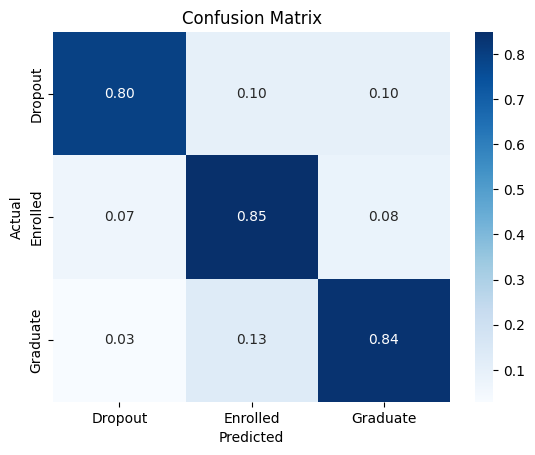

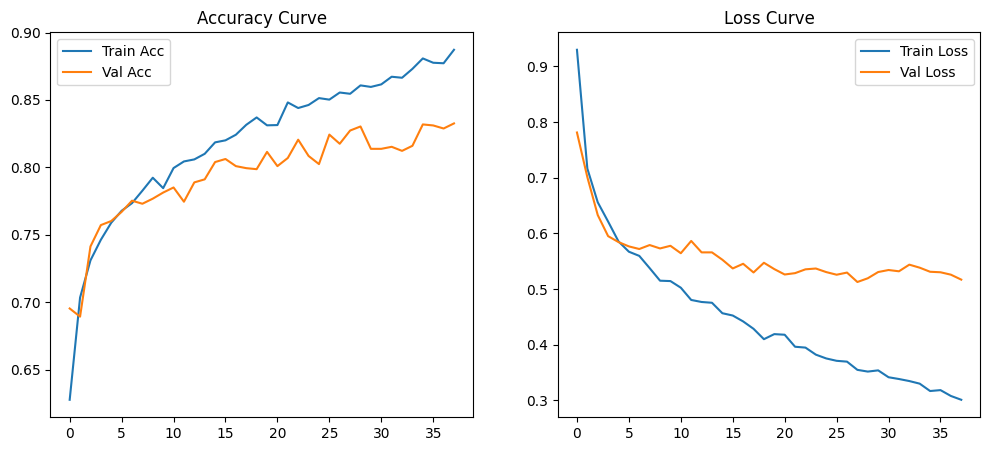

✅ All artifacts saved successfully!

✅ Model and preprocessing artifacts saved successfully!


In [ ]:
# ======================
# Student Dropout Prediction - Training Script
# ======================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# ======================
# 1. Load & Inspect Data
# ======================
df = pd.read_csv("original.csv", sep=";")

print("Shape:", df.shape)
print("Class Distribution:\n", df["Target"].value_counts())

# ======================
# 2. Preprocessing
# ======================
X = df.drop("Target", axis=1)
y = df["Target"]

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# =========================
# Save column structure
# =========================
import joblib
joblib.dump(X.columns.tolist(), "feature_columns.pkl")
print("✅ Saved feature column order to feature_columns.pkl")

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================
# 3. Balance Classes (SMOTE)
# ======================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

print("\nClass counts before SMOTE:", pd.Series(y).value_counts().to_dict())
print("Class counts after SMOTE :", pd.Series(y_res).value_counts().to_dict())

# ======================
# 4. Train-Test Split
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ======================
# 5. ANN Model
# ======================
model = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation="relu"),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(len(le.classes_), activation="softmax")  # output layer
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# EarlyStopping
early_stop = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True, verbose=1
)

# ======================
# 6. Training
# ======================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ======================
# 7. Evaluation
# ======================
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc:.4f}")

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(cm, annot=True, fmt=".2f",
            xticklabels=le.classes_, yticklabels=le.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ======================
# 8. Training Curves
# ======================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend(); plt.title("Accuracy Curve")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(); plt.title("Loss Curve")

plt.show()

# ======================
# 9. Save Artifacts
# ======================
import joblib

# Save target encoder
joblib.dump(le, "label_encoder.pkl")

# Save feature scaler
joblib.dump(scaler, "scaler.pkl")

# Save feature column order (important for inference)
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

# Save trained model
model.save("student_dropout_model.keras")

print("✅ All artifacts saved successfully!")


print("\n✅ Model and preprocessing artifacts saved successfully!")


In [ ]:
import numpy as np

# Example new student data (must match dataset features)
new_data = {
    "Admission grade": [140],
    "Age at enrollment": [20],
    "Debtor": [0],
    "Tuition fees up to date": [1],
    "Scholarship holder": [1],
    "Educational special needs": [0],
    "Curricular units 1st sem (enrolled)": [6],
    "Curricular units 1st sem (evaluations)": [6],
    "Curricular units 1st sem (approved)": [5],
    "Curricular units 1st sem (grade)": [13],
    "Curricular units 2nd sem (enrolled)": [7],
    "Curricular units 2nd sem (evaluations)": [7],
    "Curricular units 2nd sem (approved)": [6],
    "Curricular units 2nd sem (grade)": [14],
    "Course": ["Biology"],
    "Daytime/evening attendance": ["Daytime"],
    "Application mode": ["Normal"]
}

new_df = pd.DataFrame(new_data)

# 🟢 Apply the same preprocessing
new_df_encoded = pd.get_dummies(new_df, drop_first=True)

# Align with training columns (missing columns will be added with 0)
new_df_encoded = new_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale with the SAME scaler
new_scaled = scaler.transform(new_df_encoded)

# Predict
prediction = model.predict(new_scaled).argmax(axis=1)
predicted_class = le.inverse_transform(prediction)

print("Predicted Class:", predicted_class[0])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: Graduate


In [ ]:
# =========================
# 9. Test on New Student Data
# =========================
import numpy as np

# Example new student data
new_data = {
    "Admission grade": [140],
    "Age at enrollment": [20],
    "Debtor": [0],
    "Tuition fees up to date": [1],
    "Scholarship holder": [1],
    "Educational special needs": [0],
    "Curricular units 1st sem (enrolled)": [6],
    "Curricular units 1st sem (evaluations)": [6],
    "Curricular units 1st sem (approved)": [5],
    "Curricular units 1st sem (grade)": [13],
    "Curricular units 2nd sem (enrolled)": [7],
    "Curricular units 2nd sem (evaluations)": [7],
    "Curricular units 2nd sem (approved)": [6],
    "Curricular units 2nd sem (grade)": [14],
    "Course": ["Biology"],
    "Daytime/evening attendance": ["Daytime"],
    "Application mode": ["Normal"]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Apply same preprocessing as training
new_df_encoded = pd.get_dummies(new_df, drop_first=True)

# Align with training feature space (add missing cols with 0)
new_df_encoded = new_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale with SAME scaler used during training
new_scaled = scaler.transform(new_df_encoded)

# Predict
prediction = model.predict(new_scaled).argmax(axis=1)
predicted_class = le.inverse_transform(prediction)

print("🎯 Predicted Class:", predicted_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
🎯 Predicted Class: Graduate


In [ ]:
# =========================
# 9. Test on Dropout Student Data
# =========================
import numpy as np

# Example dropout student data
dropout_data = {
    "Admission grade": [95],
    "Age at enrollment": [24],
    "Debtor": [1],
    "Tuition fees up to date": [0],
    "Scholarship holder": [0],
    "Educational special needs": [0],
    "Curricular units 1st sem (enrolled)": [6],
    "Curricular units 1st sem (evaluations)": [6],
    "Curricular units 1st sem (approved)": [1],
    "Curricular units 1st sem (grade)": [7],
    "Curricular units 2nd sem (enrolled)": [6],
    "Curricular units 2nd sem (evaluations)": [6],
    "Curricular units 2nd sem (approved)": [2],
    "Curricular units 2nd sem (grade)": [8],
    "Course": ["Engineering"],
    "Daytime/evening attendance": ["Evening"],
    "Application mode": ["Special"]
}

# Convert to DataFrame
dropout_df = pd.DataFrame(dropout_data)

# Apply same preprocessing as training
dropout_df_encoded = pd.get_dummies(dropout_df, drop_first=True)

# Align with training feature space (add missing cols with 0)
dropout_df_encoded = dropout_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale with SAME scaler used during training
dropout_scaled = scaler.transform(dropout_df_encoded)

# Predict
dropout_prediction = model.predict(dropout_scaled).argmax(axis=1)
predicted_class = le.inverse_transform(dropout_prediction)

print("🎯 Predicted Class:", predicted_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
🎯 Predicted Class: Dropout


In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.3 MB/s eta 0:00:00


In [ ]:
!ngrok config add-authtoken 32JfG8DiIdotzp2fCKaq2cIUVD4_89uyd3S7DiYmrA3j7eY6Q

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
code = """
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf

# ==========================
# Load saved model & encoders
# ==========================
model = tf.keras.models.load_model("student_dropout_model.keras")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.pkl")
feature_columns = joblib.load("feature_columns.pkl")

# Define columns
num_cols = [
    "Admission grade", "Age at enrollment", "Debtor",
    "Tuition fees up to date", "Scholarship holder",
    "Educational special needs",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)"
]

cat_cols = ["Course", "Daytime/evening attendance", "Application mode"]

# ==========================
# Streamlit UI
# ==========================
st.title("🎓 Student Dropout Prediction App")
st.write("Fill in the student details to predict the dropout risk.")

# Numeric inputs
admission_grade = st.number_input("Admission grade", 0, 200, 140)
age = st.number_input("Age at enrollment", 15, 60, 20)
debtor = st.selectbox("Debtor", [0, 1])
tuition = st.selectbox("Tuition fees up to date", [0, 1])
scholarship = st.selectbox("Scholarship holder", [0, 1])
special_needs = st.selectbox("Educational special needs", [0, 1])
c1_enrolled = st.number_input("Curricular units 1st sem (enrolled)", 0, 15, 6)
c1_eval = st.number_input("Curricular units 1st sem (evaluations)", 0, 15, 6)
c1_approved = st.number_input("Curricular units 1st sem (approved)", 0, 15, 5)
c1_grade = st.number_input("Curricular units 1st sem (grade)", 0, 20, 13)
c2_enrolled = st.number_input("Curricular units 2nd sem (enrolled)", 0, 15, 7)
c2_eval = st.number_input("Curricular units 2nd sem (evaluations)", 0, 15, 7)
c2_approved = st.number_input("Curricular units 2nd sem (approved)", 0, 15, 6)
c2_grade = st.number_input("Curricular units 2nd sem (grade)", 0, 20, 14)

# Categorical inputs
course = st.selectbox("Course", ["Biology", "Math", "Physics", "Chemistry"])
attendance = st.selectbox("Daytime/evening attendance", ["Daytime", "Evening"])
app_mode = st.selectbox("Application mode", ["Normal", "Special", "Transfer"])

# ==========================
# Preprocess Input
# ==========================
num_data = pd.DataFrame([[
    admission_grade, age, debtor, tuition, scholarship, special_needs,
    c1_enrolled, c1_eval, c1_approved, c1_grade,
    c2_enrolled, c2_eval, c2_approved, c2_grade
]], columns=num_cols)

cat_data = pd.DataFrame([[course, attendance, app_mode]], columns=cat_cols)

# Merge & apply get_dummies
input_df = pd.concat([num_data, cat_data], axis=1)
input_df = pd.get_dummies(input_df)

# Reindex to match training columns
input_df = input_df.reindex(columns=feature_columns, fill_value=0)

# Scale features
X_input = scaler.transform(input_df)

# ==========================
# Prediction
# ==========================
if st.button("Predict Dropout Risk"):
    probs = model.predict(X_input, verbose=0)[0]
    predicted_class = le.inverse_transform([np.argmax(probs)])[0]

    st.success(f"🎯 Prediction: **{predicted_class}**")
    st.write("📊 Class Probabilities:")
    for label, prob in zip(le.classes_, probs.round(3)):
        st.write(f"- {label}: {prob}")

"""

# Write the code to frontend.py
with open("frontend.py", "w") as f:
    f.write(code)

print("✅ frontend.py created!")


✅ frontend.py created!


In [ ]:
!ls
from pyngrok import ngrok

# Kill all existing tunnels
ngrok.kill()


 feature_columns.pkl  'original (1).csv'   scaler.pkl
 frontend.py	       original.csv	   student_dropout_model.keras
 label_encoder.pkl     sample_data


In [ ]:
import subprocess, time
from pyngrok import ngrok

# Kill any old process
!kill -9 $(lsof -t -i:8501) 2>/dev/null || echo "No process on 8501"

# Start Streamlit in background
process = subprocess.Popen(["streamlit", "run", "frontend.py", "--server.port=8501"])

# Wait longer for Streamlit to initialize
time.sleep(15)

# Start ngrok tunnel
public_url = ngrok.connect(8501)
print("🎉 App running at:", public_url)


🎉 App running at: NgrokTunnel: "https://c9fc087a75b6.ngrok-free.app" -> "http://localhost:8501"
